In [ ]:
%load_ext autoreload
%autoreload 2

from LCNE_patchseq_analysis.data_util.metadata import load_ephys_metadata
from LCNE_patchseq_analysis.figures.fig_3a import (
    figure_3a_ccf_sagittal,
    figure_3a_ycoord_violin,
    sup_figure_3a_ccf_coronal,
)
from LCNE_patchseq_analysis.figures.fig_3b import figure_3b_imputed_scRNAseq, figure_3b_imputed_MERFISH
from LCNE_patchseq_analysis.figures.fig_3c import figure_3c_tau_comparison
from LCNE_patchseq_analysis.figures import GLOBAL_FILTER, GENE_FILTER

In [3]:
df_meta = load_ephys_metadata(if_from_s3=True, if_with_seq=True)

Figure saved as main_figure.png/.pdf


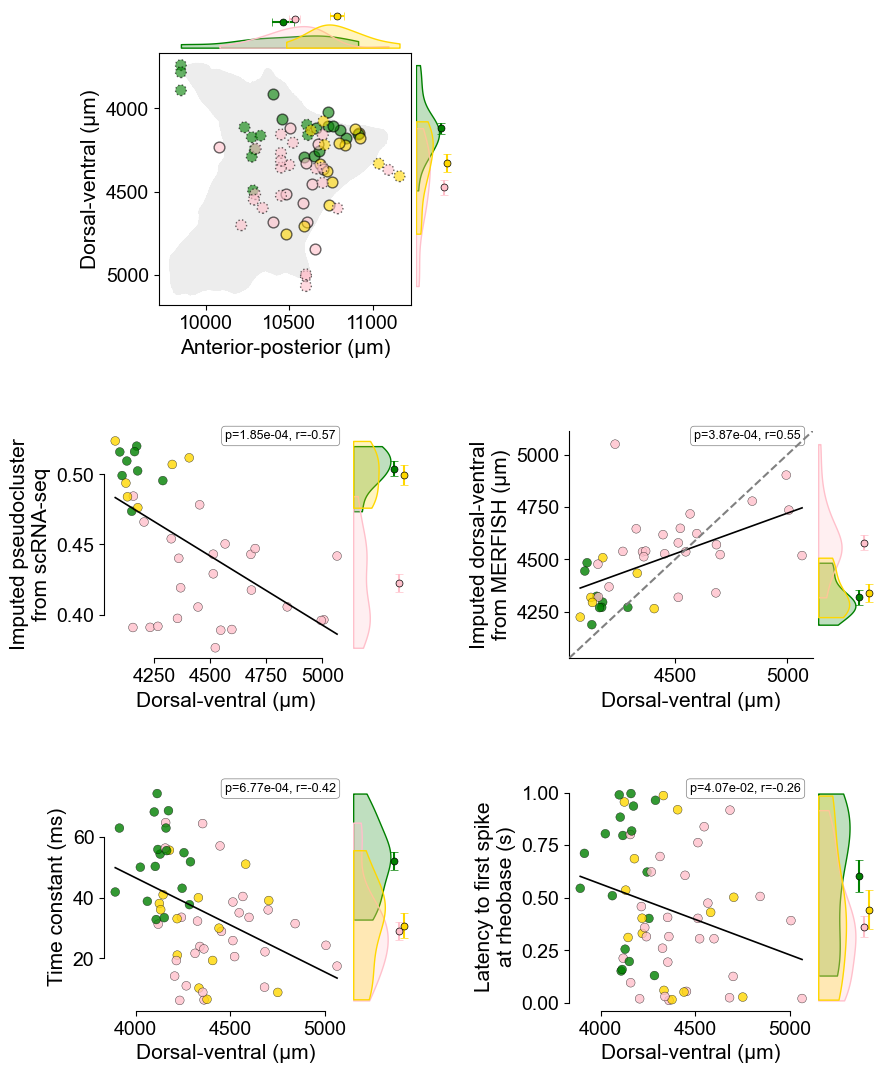

In [8]:
from LCNE_patchseq_analysis.figures.main_figure import generate_main_figure
from LCNE_patchseq_analysis.figures import GLOBAL_FILTER, GENE_FILTER, set_plot_style

set_plot_style(base_size=15, font_family="Arial")
generate_main_figure(df_meta, GLOBAL_FILTER, GENE_FILTER);

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': "LC Mesh with Filtered Data Points (Coronal View)\nFilter: (`jem-status_reporter` == 'Positive') & (`injection region` != 'Non-Retro') & (`injection region` != 'Thalamus')\nn = 102 cells"}, xlabel='Left-right (μm)', ylabel='Dorsal-ventral (μm)'>)

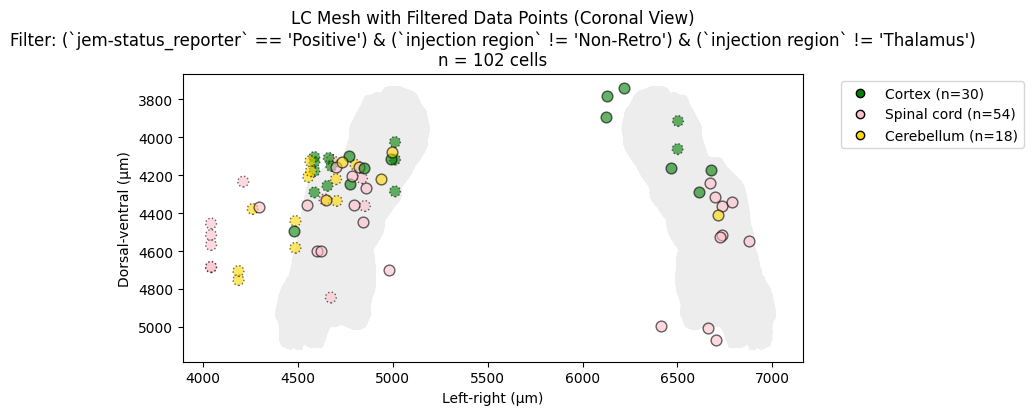

In [6]:
sup_figure_3a_ccf_coronal(df_meta, GLOBAL_FILTER)

## ANOVA on ephys features

In [9]:
from LCNE_patchseq_analysis.population_analysis.anova import anova_ipfx_features, anova_gene

In [13]:
result_ipfx = anova_ipfx_features(df_meta, filter_query=GLOBAL_FILTER)
result_ipfx.head(15)

,feature,term,df,sum_sq,mean_sq,F,p,partial_eta_sq,p_adj,significant
0,ipfx_tau,"C(Q(""injection region""))",2.0,0.003315,0.001657,7.436815,0.001350,0.206941,0.034066,True
1,ipfx_tau,"Q(""y"")",1.0,0.000288,0.000288,1.293976,0.260076,0.022197,0.941131,False
2,ipfx_peak_v_adapt_ratio,"C(Q(""injection region""))",2.0,0.064801,0.032400,6.317538,0.003818,0.219225,0.034066,True
3,ipfx_peak_v_adapt_ratio,"Q(""y"")",1.0,0.000044,0.000044,0.008528,0.926834,0.000189,0.964881,False
4,ipfx_trough_slowdeltav_rheo,"C(Q(""injection region""))",2.0,15.156036,7.578018,6.062785,0.004099,0.175414,0.034066,True
5,ipfx_trough_slowdeltav_rheo,"Q(""y"")",1.0,0.003817,0.003817,0.003054,0.956125,0.000054,0.964881,False
6,ipfx_vm_for_sag,"C(Q(""injection region""))",2.0,1844.716735,922.358368,5.938660,0.004542,0.172442,0.034066,True
7,ipfx_vm_for_sag,"Q(""y"")",1.0,1.916652,1.916652,0.012340,0.911937,0.000216,0.964881,False
8,ipfx_sag_depol,"C(Q(""injection region""))",2.0,0.032028,0.016014,2.908181,0.063499,0.100601,0.346277,False
9,ipfx_sag_depol,"Q(""y"")",1.0,0.006547,0.006547,1.189011,0.280556,0.022354,0.941131,False


In [14]:
result_gene = anova_gene(df_meta, filter_query=GENE_FILTER)
result_gene.head(15)

ANOVA failed for feature 'gene_RNA_QC (log_normed)': endog has evaluated to an array with multiple columns that has shape (38, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).


,feature,term,df,sum_sq,mean_sq,F,p,partial_eta_sq,p_adj,significant
0,gene_imp_pseudoclusters (log_normed),"C(Q(""injection region""))",2.0,0.029796,0.014898,19.876681,0.000002,0.539004,0.000086,True
1,gene_imp_pseudoclusters (log_normed),"Q(""y"")",1.0,0.000496,0.000496,0.662208,0.421444,0.019105,0.913617,False
2,gene_Gjb6 (log_normed),"C(Q(""injection region""))",2.0,41.507631,20.753815,8.178533,0.001259,0.324822,0.028333,True
3,gene_Gjb6 (log_normed),"Q(""y"")",1.0,2.027350,2.027350,0.798925,0.377698,0.022958,0.913617,False
4,gene_imp_AP (log_normed),"C(Q(""injection region""))",2.0,11.836721,5.918361,1.166821,0.323512,0.064228,0.632957,False
5,gene_imp_AP (log_normed),"Q(""y"")",1.0,40.570467,40.570467,7.998577,0.007793,0.190449,0.182012,False
6,gene_Kcnj2 (log_normed),"C(Q(""injection region""))",2.0,2.570572,1.285286,4.068547,0.026052,0.193110,0.293087,False
7,gene_Kcnj2 (log_normed),"Q(""y"")",1.0,2.500401,2.500401,7.914970,0.008089,0.188834,0.182012,False
8,gene_imp_DV (log_normed),"C(Q(""injection region""))",2.0,326.419706,163.209853,4.533059,0.017982,0.210516,0.269728,False
9,gene_imp_DV (log_normed),"Q(""y"")",1.0,82.633800,82.633800,2.295106,0.139025,0.063235,0.913617,False


Figure saved as sup_fig_3c_all_ipfx_features.png/.pdf


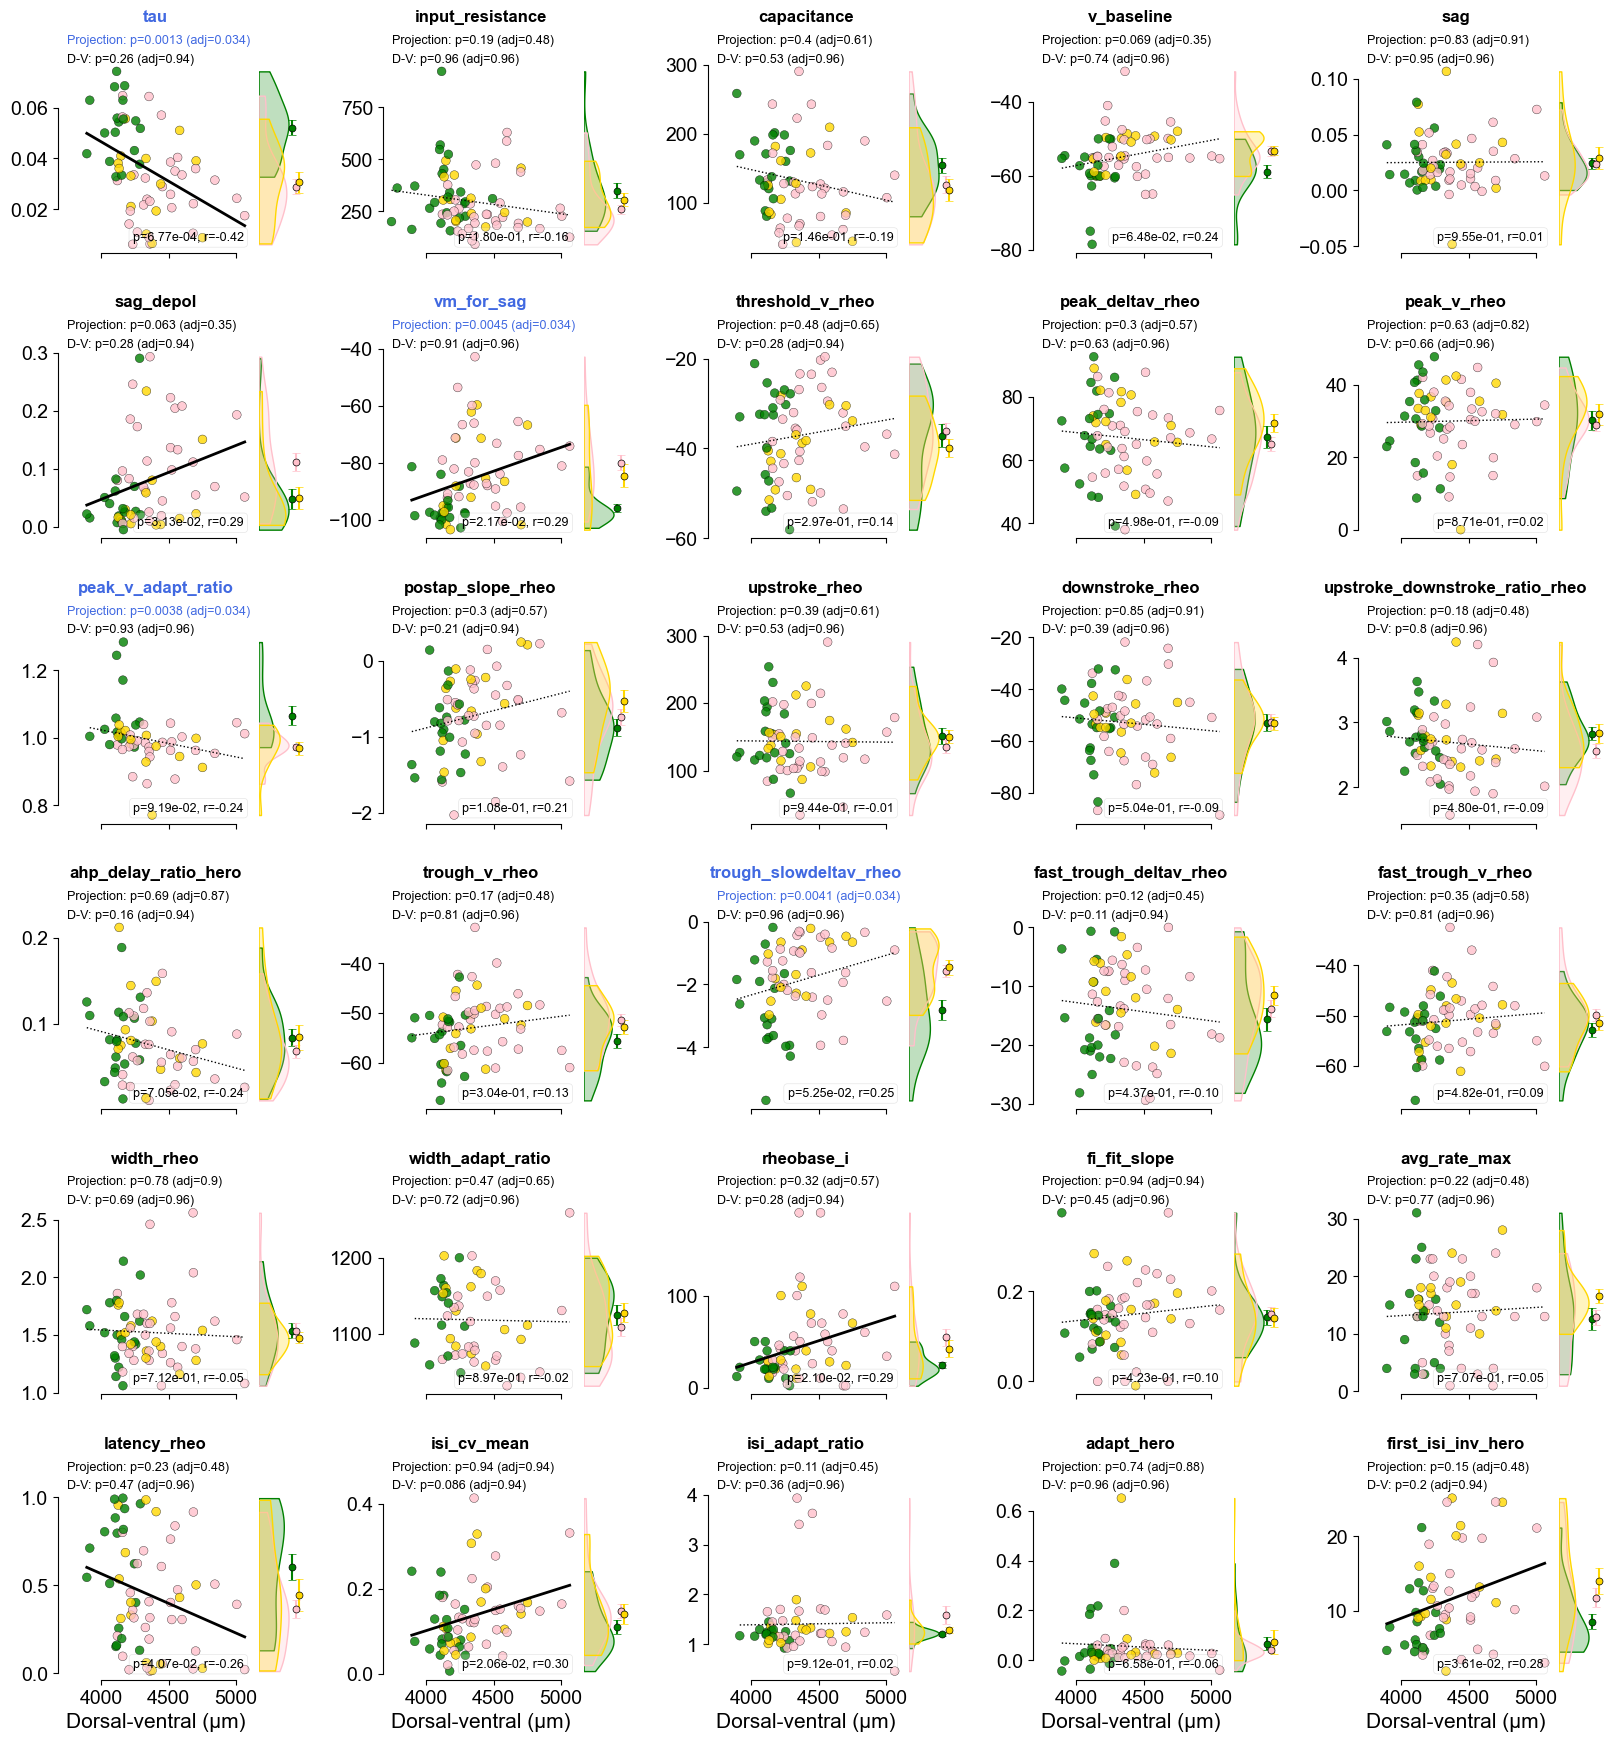

In [57]:
from LCNE_patchseq_analysis.figures.fig_3c import sup_figure_3c_all_ipfx_features
sup_figure_3c_all_ipfx_features(df_meta, filter_query=GLOBAL_FILTER);